In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.ensemble import RandomForestClassifier
import csv

%matplotlib inline

In [21]:
# Reads the file to a dataframe

data = pd.read_csv('/home/rudraksh/Desktop/Data Science Projects/Titanic Data/titanic_data.csv')
test = pd.read_csv('/home/rudraksh/Desktop/Data Science Projects/Titanic Data/test.csv')
test_final = pd.read_csv('/home/rudraksh/Desktop/Data Science Projects/Titanic Data/titanic3.csv')

# Data Cleaning

In [22]:
# Returns the names of columns where we have missing values along with the indices
def findnan(df):
    cols = list(df.columns)
    miss_val = {}
    for col in cols:
        miss_val[col] = [i for i in range(len(df)) if (df[col].iloc[i] != df[col].iloc[i]) ]
    return miss_val

miss_val_data = findnan(data)
miss_val_test = findnan(test)

In [23]:
# Gets the ages of various salutations from the dataset where ages aren't missing

complete_age_data = set(range(len(data))) - set(miss_val_data['Age'])
complete_age_test = set(range(len(test))) - set(miss_val_test['Age'])

ages = {'ms_ages' : [], 'master_ages' : [], 'mrs_ages' : [], 'mr_ages' : [], 'dr_ages' : [], 'rev_ages' : []}

for i in complete_age_data:
    age = data.iloc[i].Age
    name = data.iloc[i].Name
    
    if 'Miss.' in name:
        ages['ms_ages'].append(age)
    elif 'Master.' in name:
        ages['master_ages'].append(age)
    elif ('Mr.' in name) or ('Don.' in name) or ('Major.' in name) or ('Col.' in name) or ('Capt.' in name) or ('Sir' in name):
        ages['mr_ages'].append(age)
    elif ('Mrs.' in name) or ('Mme.' in name) or ('Lady' in name) or ('Ms.' in name) or ('Mlle.' in name):
        ages['mrs_ages'].append(age)
    elif 'Dr.' in name:
        ages['dr_ages'].append(age)
    elif 'Rev.' in name:
        ages['rev_ages'].append(age)
    else:
        print name
        
for i in complete_age_test:
    age = test.iloc[i].Age
    name = test.iloc[i].Name
    
    if 'Miss.' in name:
        ages['ms_ages'].append(age)
    elif 'Master.' in name:
        ages['master_ages'].append(age)
    elif ('Mr.' in name) or ('Don.' in name) or ('Major.' in name) or ('Col.' in name) or ('Capt.' in name) or ('Sir' in name):
        ages['mr_ages'].append(age)
    elif ('Mrs.' in name) or ('Mme.' in name) or ('Lady.' in name) or ('Ms.' in name) or ('Mlle.' in name):
        ages['mrs_ages'].append(age)
    elif 'Dr.' in name:
        ages['dr_ages'].append(age)
    elif 'Rev.' in name:
        ages['rev_ages'].append(age)
    else:
        print name
    

Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)
Reuchlin, Jonkheer. John George
Oliva y Ocana, Dona. Fermina


In [24]:
# Finds the median of a list
def get_median(ages_list):
    sorted_list = sorted(ages_list)
    n = len(sorted_list)
    if n % 2 == 0:
        median = (sorted_list[ n/2 - 1] + sorted_list[n/2]) * 0.5
    else:
        median = sorted_list[(n-1)/2]
    return median

# Finds the median of all salutations' ages
medians = {}
for key in ages.keys():
    medians[key] = get_median(ages[key])
    
# Fills missing ages
median_df = data.Age.median()

for i in miss_val_data['Age']:
    name = data.iloc[i].Name

    if 'Miss.' in name:
        data.set_value(i,'Age', medians['ms_ages'])
    elif 'Master.' in name:
        data.set_value(i,'Age', medians['master_ages'])
    elif ('Mr.' in name) or ('Don.' in name) or ('Major.' in name) or ('Col.' in name) or ('Capt.' in name) or ('Sir' in name):
        data.set_value(i,'Age', medians['mr_ages'])
    elif ('Mrs.' in name) or ('Mme.' in name) or ('Lady.' in name) or ('Ms.' in name) or ('Mlle.' in name):
        data.set_value(i,'Age', medians['mrs_ages'])
    elif 'Dr.' in name:
        data.set_value(i,'Age', medians['dr_ages'])
    elif 'Rev.' in name:
        data.set_value(i,'Age', medians['rev_ages'])
    else:
        data.set_value(i,'Age', median_df)
        
        
for i in miss_val_test['Age']:
    name = test.iloc[i].Name

    if 'Miss.' in name:
        test.set_value(i,'Age', medians['ms_ages'])
    elif 'Master.' in name:
        test.set_value(i,'Age', medians['master_ages'])
    elif ('Mr.' in name) or ('Don.' in name) or ('Major.' in name) or ('Col.' in name) or ('Capt.' in name) or ('Sir' in name):
        test.set_value(i,'Age', medians['mr_ages'])
    elif ('Mrs.' in name) or ('Mme.' in name) or ('Lady.' in name) or ('Ms.' in name) or ('Mlle.' in name):
        test.set_value(i,'Age', medians['mrs_ages'])
    elif 'Dr.' in name:
        test.set_value(i,'Age', medians['dr_ages'])
    elif 'Rev.' in name:
        test.set_value(i,'Age', medians['rev_ages'])
    else:
        test.set_value(i,'Age', median_df)
        
# Fill the missing age data with median age and fare data with median fare
median_age = data.Age.median()
median_fare = data.Fare.median()
data.fillna({'Age':median_age, 'Fare':median_fare}, inplace = True)


median_age = test.Age.median()
median_fare = test.Fare.median()
test.fillna({'Age':median_age, 'Fare':median_fare}, inplace = True)

        
# Converts Gender to float
data['Sex'] = data.Sex.map({'male':0, 'female':1})

test['Sex'] = test.Sex.map({'male':0, 'female':1})


# Fill missing Data with mode and convert port of embarkment to float
mode_embarked =  data.Embarked.mode().iloc[0]
data.fillna({'Embarked': mode_embarked}, inplace = True)
data['Embarked'] = data.Embarked.map({'S':0, 'C':1, 'Q':2})

mode_embarked =  test.Embarked.mode().iloc[0]
test.fillna({'Embarked': mode_embarked}, inplace = True)
test['Embarked'] = test.Embarked.map({'S':0, 'C':1, 'Q':2})


# Drop columns which are strings
data.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis=1, inplace = True)

test_pdata = test.PassengerId
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace = True)

Feature ranking:
1. feature 5 (0.277791)
2. feature 2 (0.274233)
3. feature 1 (0.242930)
4. feature 0 (0.103577)
5. feature 3 (0.052007)
6. feature 6 (0.027752)
7. feature 4 (0.021710)


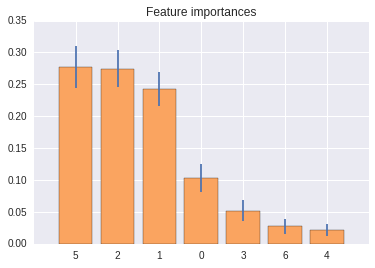

In [25]:
train_labels = data.values[:,0]
train_data = data.values[:,1:]
test_data = test.values

# Build a forest and compute the feature importances
clf = RandomForestClassifier(n_estimators=1000, max_features= None, criterion='entropy', min_samples_split =3)
clf.fit( train_data, train_labels )
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_data.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_data.shape[1]), importances[indices],
       color="sandybrown", yerr=std[indices], align="center")
plt.xticks(range(train_data.shape[1]), indices)
plt.xlim([-1, train_data.shape[1]])
plt.show()

In [26]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,0
1,1,1,1,38,1,0,71.2833,1
2,1,3,1,26,0,0,7.9250,0
3,1,1,1,35,1,0,53.1000,0
4,0,3,0,35,0,0,8.0500,0


In [27]:
# Predict
test_labels = clf.predict(test_data).astype(int)

# convert the solution into a dictionary
sol = {'PassengerId': test_pdata, 'Survived':test_labels}

with open('titanic_solution.csv', 'wb') as outfile:
    w = csv.DictWriter(outfile, sol.keys())
    w.writeheader()
    for i in range(len(test_labels)):
        w.writerow({'PassengerId':test_pdata[i], 'Survived':test_labels[i]})
        
sol_data = pd.read_csv('/home/rudraksh/Desktop/Data Science Projects/Titanic Data/titanic_solution.csv')

# What if we combine parch and sibsp and drop port embarkment

In [28]:
data['Family'] = data['SibSp'] + data['Parch'] 
data1 = data.copy() #Backup of data
data.drop(['SibSp', 'Parch', 'Embarked'], axis=1, inplace=True)

test['Family'] = test['SibSp'] + test['Parch'] 
test1 = test.copy() #Backup of test data
test.drop(['SibSp', 'Parch', 'Embarked'], axis=1, inplace=True)

Feature ranking:
1. feature 1 (0.337780)
2. feature 3 (0.242006)
3. feature 2 (0.236008)
4. feature 0 (0.109213)
5. feature 4 (0.074993)


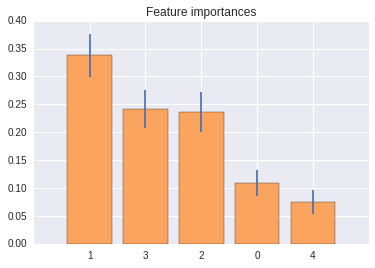

In [29]:
train_labels = data.values[:,0]
train_data = data.values[:,1:]
test_data = test.values

# Build a forest and compute the feature importances
clf = RandomForestClassifier(n_estimators=100, max_features= None, criterion='gini', min_samples_split =5, oob_score=True)
clf.fit( train_data, train_labels )
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_data.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_data.shape[1]), importances[indices],
       color="sandybrown", yerr=std[indices], align="center")
plt.xticks(range(train_data.shape[1]), indices)
plt.xlim([-1, train_data.shape[1]])
plt.show()

In [30]:
# Predict
test_labels = clf.predict(test_data).astype(int)

# convert the solution into a dictionary
sol = {'PassengerId': test_pdata, 'Survived':test_labels}

with open('titanic_solution.csv', 'wb') as outfile:
    w = csv.DictWriter(outfile, sol.keys())
    w.writeheader()
    for i in range(len(test_labels)):
        w.writerow({'PassengerId':test_pdata[i], 'Survived':test_labels[i]})
        
sol_titanic = pd.read_csv('/home/rudraksh/Desktop/Data Science Projects/Titanic Data/titanic_solution.csv')

# Analysis of various factors affecting survival of passengers.

# Survival by Gender

,Survived,Total,Proportion
Sex,,,
M,109,577,0.318713
F,233,314,0.681287


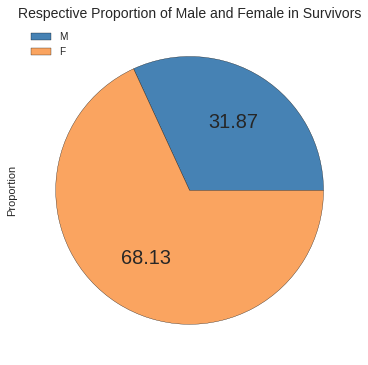

In [31]:
# Creates separate df for male as well as female

male_data = data[data.Sex == 0]
male_survived = male_data[male_data.Survived == 1]
male_dsurvived = male_data[male_data.Survived == 0]

female_data = data[data.Sex == 1]
female_survived = female_data[female_data.Survived == 1]
female_dsurvived = female_data[female_data.Survived == 0]

survived = data[data.Survived == 1]
df = survived.groupby('Sex').count()[['Survived']]
df = df.rename(index ={0:'M', 1:'F'})
df['Total'] = [len(male_data), len(female_data)]
df['Proportion'] = df.Survived / df.Survived.sum()

# Plots the respective proportion of male and females in survivors as a pie chart.
ax = df['Proportion'].plot(kind='pie', figsize =[6,6], autopct='%.2f', fontsize =20, legend = True, labels=None,
                      colors = ['steelblue','sandybrown'])
ax.set_title('Respective Proportion of Male and Female in Survivors', size=14)

df

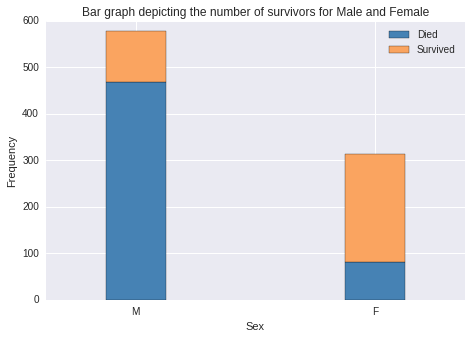

In [32]:
# Plots a stacked bar graph depicting number of people that survived and died respectively.

# New column representing number of people that died
df['Died'] = df.Total - df.Survived
df[['Died', 'Survived']].plot.bar(stacked=True, 
                                  color = ['steelblue','sandybrown'],
                                  figsize = [7.5,5], 
                                  width = .25)
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.title('Bar graph depicting the number of survivors for Male and Female')

# Survival by Age

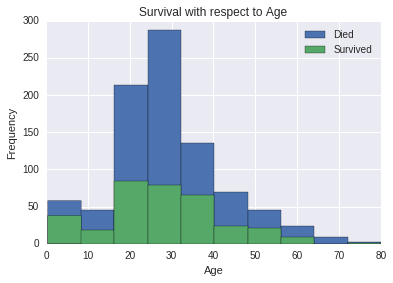

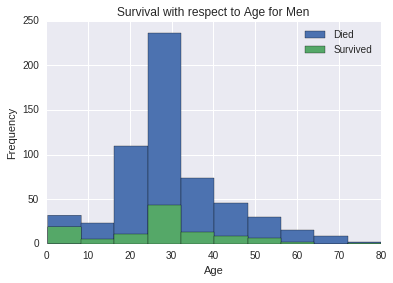

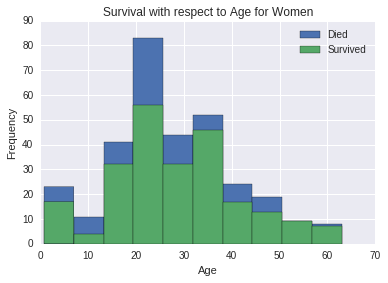

In [33]:
# Plots a stacked histogram depicitng number of people that survived and died wrt age

# For the whole dataframe
a = pd.DataFrame()
a['Died'] = data['Age']
a.plot.hist(legend=True)

a['Survived'] = data[data.Survived == 1]['Age']
a['Survived'].plot.hist(legend=True)
plt.xlabel('Age')
plt.title('Survival with respect to Age')
plt.show()

# For men
a = pd.DataFrame()
a['Died'] = male_data['Age']
a.plot.hist(legend=True)

a['Survived'] = male_survived['Age']
a['Survived'].plot.hist(legend=True)
plt.xlabel('Age')
plt.title('Survival with respect to Age for Men')
plt.show()

# For women
a = pd.DataFrame()
a['Died'] = female_data['Age']
a.plot.hist(legend=True)

a['Survived'] = female_survived['Age']
a['Survived'].plot.hist(legend=True)
plt.xlabel('Age')
plt.title('Survival with respect to Age for Women')
plt.show()

In [34]:
# Gets people that survived and died in a specific age interval. Bins specify the intervals.

def get_catg_survival(df, bins_list, param):
    df[param + '_catg'] = pd.cut(df[param], bins= bins_list, labels=False)  #Gives label acc to bin and value
    catg_survival = {}
    for i in range(len(df)):
        res = df.iloc[i].Survived
        catg = df.iloc[i][param + '_catg']
        if catg not in catg_survival:
            catg_survival[catg] = [res]
        else:
            catg_survival[catg].append(res)

    catgwise_survival = {}        
    for catg in catg_survival:
        survived = sum(catg_survival[catg])
        died = len(catg_survival[catg]) - survived
        catgwise_survival[catg] = [survived, died]
    return pd.DataFrame(catgwise_survival, index=['Survived', 'Died'])


bins_list = [0, 15, 40 , 55, 100]
catg_survivalm = get_catg_survival(male_data, bins_list, 'Age')
catg_survivalf = get_catg_survival(female_data, bins_list, 'Age')

# Rename columns
catg_survivalm.columns = ['0-15', '16-40', '41-55', '56 & above']
catg_survivalf.columns = ['0-15', '16-40', '41-55', '56 & above']

# Transposes df
catg_survivalf = catg_survivalf.T
catg_survivalm = catg_survivalm.T

# Add a total column and probability of survival column
catg_survivalf['Total'] = catg_survivalf.Survived + catg_survivalf.Died
catg_survivalm['Total'] = catg_survivalm.Survived + catg_survivalm.Died

catg_survivalf['Probability of Survival'] = catg_survivalf.Survived  / catg_survivalf.Total
catg_survivalm['Probability of Survival'] = catg_survivalm.Survived  / catg_survivalm.Total

# Create a generic df
catg_survival = catg_survivalf + catg_survivalm

#Since prob are added, they will be wrong.This Corrects it
catg_survival['Probability of Survival'] = catg_survival.Survived  / catg_survival.Total

/home/rudraksh/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [35]:
catg_survivalf

,Survived,Died,Total,Probability of Survival
0-15,28,15,43,0.651163
16-40,168,55,223,0.753363
41-55,29,10,39,0.743590
56 & above,8,1,9,0.888889


In [36]:
catg_survivalm

,Survived,Died,Total,Probability of Survival
0-15,23,21,44,0.522727
16-40,68,362,430,0.158140
41-55,14,58,72,0.194444
56 & above,4,27,31,0.129032


In [37]:
catg_survival

,Survived,Died,Total,Probability of Survival
0-15,51,36,87,0.586207
16-40,236,417,653,0.361409
41-55,43,68,111,0.387387
56 & above,12,28,40,0.300000


# Survival by Fare:

In [38]:
# Get fare wise survival in specific age intervals
bins_list = [-1, 10, 30, 100, 200, 300, 600]
fare_catg_survival = get_catg_survival(data, bins_list, 'Fare')
fare_catg_survival_f = get_catg_survival(male_data, bins_list, 'Fare')
fare_catg_survival_m = get_catg_survival(male_data, bins_list, 'Fare')

# Renames columns and transposes it
fare_catg_survival.columns = ['0-10', '11-30','31-100', '100-200', '201-300', '301 and above']
fare_catg_survival_f.columns = ['0-10', '11-30','31-100', '100-200', '201-300', '301 and above']
fare_catg_survival_m.columns = ['0-10', '11-30','31-100', '100-200', '201-300', '301 and above']

fare_catg_survival = fare_catg_survival.T
fare_catg_survival_f = fare_catg_survival_f.T
fare_catg_survival_m = fare_catg_survival_m.T

# Create a probability of survival and total column
fare_catg_survival['Total'] =  fare_catg_survival.Survived + fare_catg_survival.Died
fare_catg_survival['Probability of Survival'] = fare_catg_survival.Survived / fare_catg_survival.Total

fare_catg_survival_f['Total'] =  fare_catg_survival_f.Survived + fare_catg_survival_f.Died
fare_catg_survival_f['Probability of Survival'] = fare_catg_survival_f.Survived / fare_catg_survival_f.Total

fare_catg_survival_m['Total'] =  fare_catg_survival_m.Survived + fare_catg_survival_m.Died
fare_catg_survival_m['Probability of Survival'] = fare_catg_survival_m.Survived / fare_catg_survival_m.Total

fare_catg_survival

/home/rudraksh/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Survived,Died,Total,Probability of Survival
0-10,67,269,336,0.199405
11-30,139,182,321,0.433022
31-100,97,84,181,0.535912
100-200,25,8,33,0.757576
201-300,11,6,17,0.647059
301 and above,3,0,3,1.000000


In [39]:
fare_catg_survival_f

,Survived,Died,Total,Probability of Survival
0-10,29,243,272,0.106618
11-30,41,143,184,0.222826
31-100,32,70,102,0.313725
100-200,5,6,11,0.454545
201-300,0,6,6,0.000000
301 and above,2,0,2,1.000000


In [40]:
fare_catg_survival_m

,Survived,Died,Total,Probability of Survival
0-10,29,243,272,0.106618
11-30,41,143,184,0.222826
31-100,32,70,102,0.313725
100-200,5,6,11,0.454545
201-300,0,6,6,0.000000
301 and above,2,0,2,1.000000


# Survival by Age and Fare

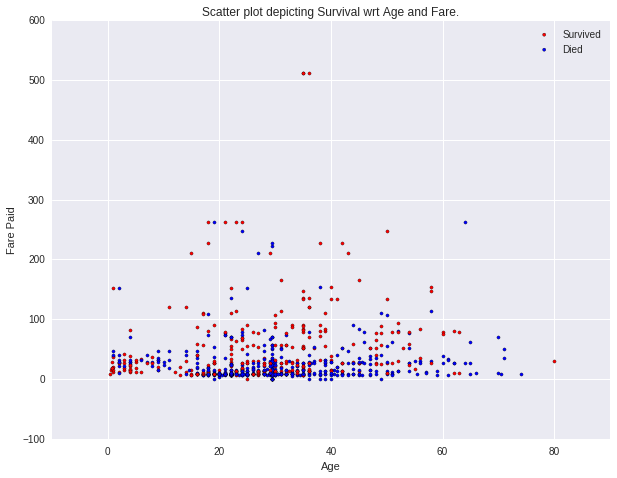

In [41]:
fig = plt.figure(figsize=[10,7.5])
ax1 = fig.add_subplot(111, title = 'Scatter plot depicting Survival wrt Age and Fare.', xlabel = 'Age',
                      ylabel = 'Fare Paid')

ax1.scatter(x=male_survived.Age, y=male_survived.Fare, s=10, c='r', marker="o", label='Survived')
ax1.scatter(x=male_dsurvived.Age, y=male_dsurvived.Fare, s=10, c='b', marker="o", label = 'Died')
ax1.scatter(x=female_survived.Age, y=female_survived.Fare, s=10, c='r', marker="o", label= None)
ax1.scatter(x=female_dsurvived.Age, y=female_dsurvived.Fare, s=10, c='b', marker="o", label = None)
plt.legend(loc='upper right')
plt.show()

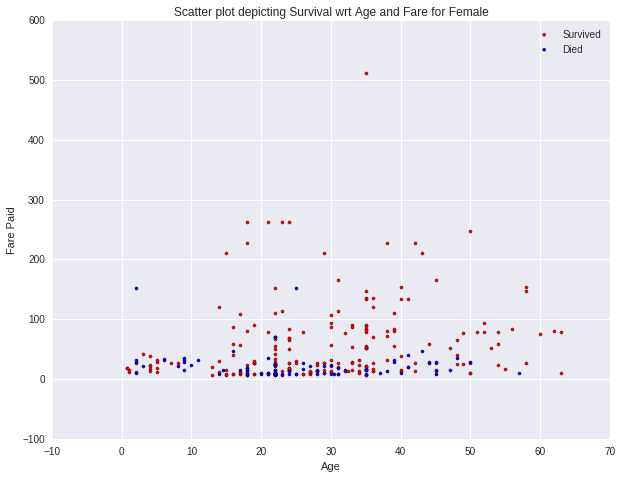

In [42]:
fig = plt.figure(figsize=[10,7.5])
ax1 = fig.add_subplot(111, title = 'Scatter plot depicting Survival wrt Age and Fare for Female', xlabel = 'Age',
                      ylabel = 'Fare Paid')

ax1.scatter(x=female_survived.Age, y=female_survived.Fare, s=10, c='r', marker="o", label='Survived')
ax1.scatter(x=female_dsurvived.Age, y=female_dsurvived.Fare, s=10, c='b', marker="o", label = 'Died')
plt.legend(loc='upper right')
plt.show()

# Survival by Passenger Class

In [43]:
# Survival statistics by Pclass for Male
a = male_data.groupby('Pclass').sum()[['Survived']]
a['Total'] = male_data.groupby('Pclass').count()['Survived']
a['Died'] = a.Total - a.Survived
a['Probability of Survival'] = a.Survived / a.Total
a

,Survived,Total,Died,Probability of Survival
Pclass,,,,
1,45,122,77,0.368852
2,17,108,91,0.157407
3,47,347,300,0.135447


In [44]:
# Survival statistics by Pclass for Female
b = female_data.groupby('Pclass').sum()[['Survived']]
b['Total'] = female_data.groupby('Pclass').count()['Survived']
b['Died'] = b.Total - b.Survived
b['Probability of Survival'] = b.Survived / b.Total
b

,Survived,Total,Died,Probability of Survival
Pclass,,,,
1,91,94,3,0.968085
2,70,76,6,0.921053
3,72,144,72,0.500000


In [45]:
# Total survival statistics
c = a+b
c['Probability of Survival'] = c.Survived / c.Total              # Puts the corrected probability here
c

,Survived,Total,Died,Probability of Survival
Pclass,,,,
1,136,216,80,0.629630
2,87,184,97,0.472826
3,119,491,372,0.242363


#  Survival by Age and Passenger Class

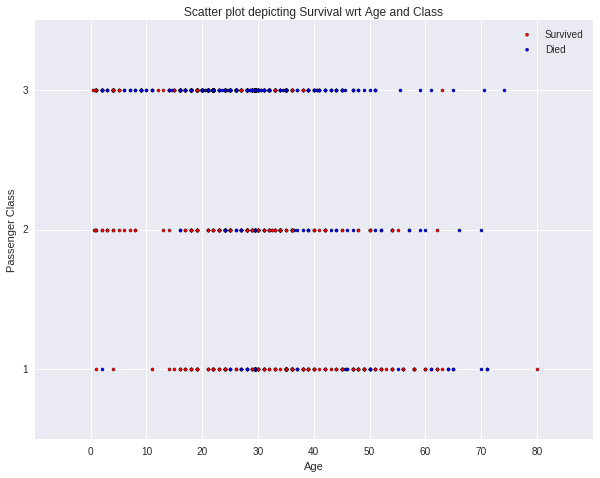

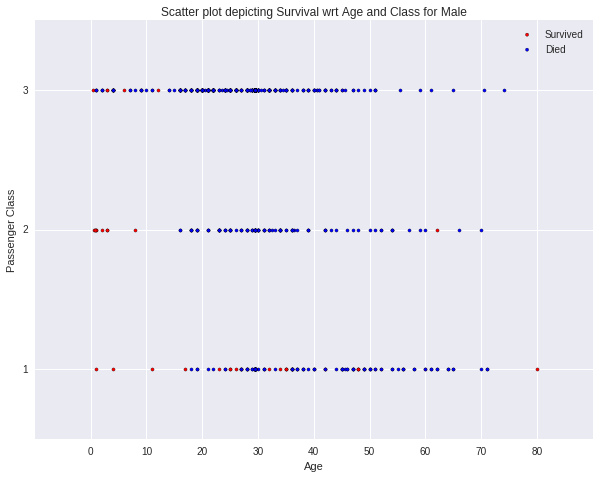

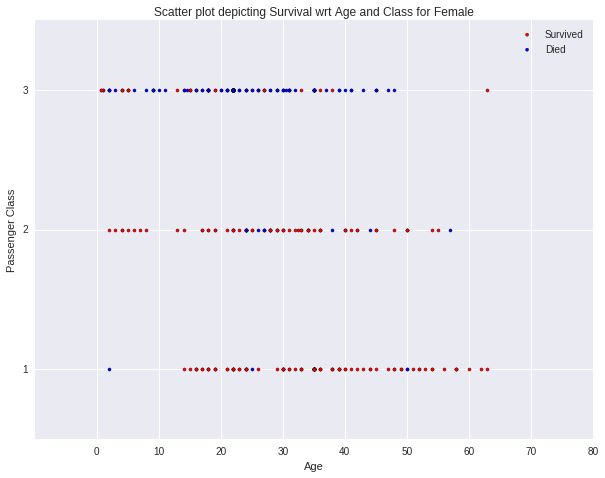

In [46]:
# Plots a scatter plot depicting survival wrt passenger class and age 
fig = plt.figure(figsize=[10,7.5])
ax1 = fig.add_subplot(111, title = 'Scatter plot depicting Survival wrt Age and Class', xlabel = 'Age',
                      ylabel = 'Passenger Class')

ax1.scatter(x=male_survived.Age, y=male_survived.Pclass, s=10, c='r', marker="o", label='Survived')
ax1.scatter(x=male_dsurvived.Age, y=male_dsurvived.Pclass, s=10, c='b', marker="o", label = 'Died')
ax1.scatter(x=female_survived.Age, y=female_survived.Pclass, s=10, c='r', marker="o", label= None)
ax1.scatter(x=female_dsurvived.Age, y=female_dsurvived.Pclass, s=10, c='b', marker="o", label = None)
plt.legend(loc='upper right')
plt.yticks([1,2,3])
plt.xticks([i*10 for i in range(9)])
plt.show()

# For men
fig = plt.figure(figsize=[10,7.5])
ax1 = fig.add_subplot(111, title = 'Scatter plot depicting Survival wrt Age and Class for Male', xlabel = 'Age',
                      ylabel = 'Passenger Class')

ax1.scatter(x=male_survived.Age, y=male_survived.Pclass, s=10, c='r', marker="o", label='Survived')
ax1.scatter(x=male_dsurvived.Age, y=male_dsurvived.Pclass, s=10, c='b', marker="o", label = 'Died')
plt.legend(loc='upper right')
plt.yticks([1,2,3])
plt.xticks([i*10 for i in range(9)])
plt.show()

# For women
fig = plt.figure(figsize=[10,7.5])
ax1 = fig.add_subplot(111, title = 'Scatter plot depicting Survival wrt Age and Class for Female', xlabel = 'Age',
                      ylabel = 'Passenger Class')

ax1.scatter(x=female_survived.Age, y=female_survived.Pclass, s=10, c='r', marker="o", label='Survived')
ax1.scatter(x=female_dsurvived.Age, y=female_dsurvived.Pclass, s=10, c='b', marker="o", label = 'Died')
plt.legend(loc='upper right')
plt.yticks([1,2,3])
plt.xticks([i*10 for i in range(9)])
plt.show()